In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.linalg
import scipy.stats
import scipy.signal
import scipy.fft as spfft
# import scipy.ndimage as spimg
from scipy.spatial.transform import Rotation as R
# import cvxpy as cvx
from importlib import reload

import util, plot
from util import *

In [2]:
reload(plot)
reload(util)
from util import *

In [3]:
util.DIMS = 2
x = np.zeros(shape=(N,2)) # amplitude, phase

# Point source
### x is source

Warning, phase terms of third order and higher must be negligible
near 100.0 0.01 True 	 d:0.010
Warning, phase terms of third order and higher must be negligible
near 100.0 0.1 True 	 d:0.100
Warning, phase terms of third order and higher must be negligible
near 100.0 1.0 True 	 d:1.000
Warning, phase terms of third order and higher must be negligible
near 100.0 10.0 True 	 d:10.000
distances (* width) 10^-2.0, 10^-1.0, 10^0.0, 10^1.0


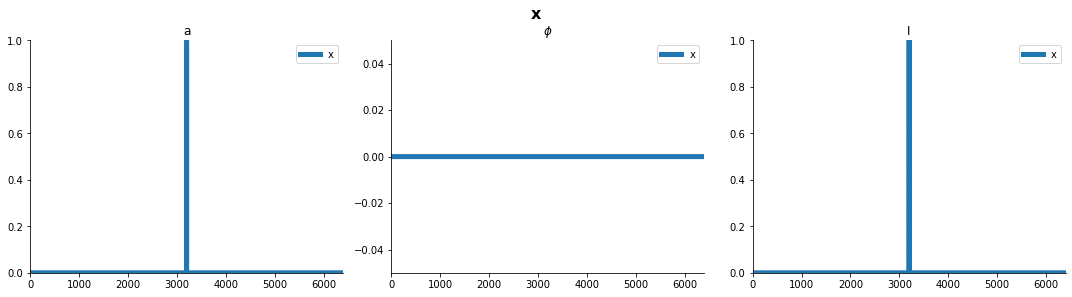

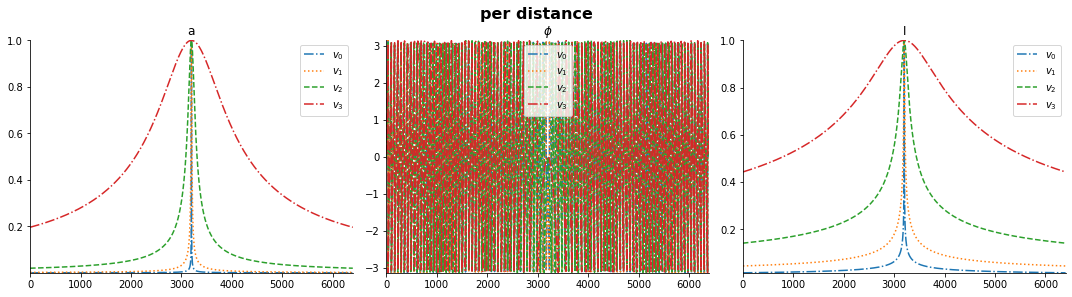

In [8]:
x_width = 1
w = sample_grid(N, x_width*LAMBDA, 0)
V = [] # TODO define both V,Y
labels = []
width = 1e2 * LAMBDA
distances = np.geomspace(1e-2, 1e1, 4)
for i,d in enumerate(distances):
# for i,d in enumerate([-1e-1, -1e1, -1e2]):
    V.append(sample_grid(N, width, -d * LAMBDA))
    labels.append(r'$v_%i$' % i)
    print('near', width/LAMBDA, d/LAMBDA, near(width, d), '\t d:%0.3f' % d)

x[:] = 0
x[N//2, 0] = 1

for i in range(len(V)):
    for m in range(N):
        V[i][m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, V[i][m])), distance=1)
    normalize_amplitude(V[i])

plot.vectors([x], ['x'], title='x', lw=5);
plot.vectors(V, labels, title='per distance');
print('distances (* width)', ', '.join(['10^' + str(d)  for d in np.log10(distances).round(3)]))

# Single Slit
### x is source
### Width: $2\lambda$

Warning, phase terms of third order and higher must be negligible
near 10.0 0.01 True 	 d:0.010
Warning, phase terms of third order and higher must be negligible
near 10.0 0.21544346900318834 True 	 d:0.215
Warning, phase terms of third order and higher must be negligible
Warning, F is near 1, for F = 21.54
near 10.0 4.6415888336127775 True 	 d:4.642
Warning, F is near 1, for F = 1.00
near 10.0 100.0 False 	 d:100.000

x_width: 2.00 lambda
distances (* width) 10^-2.0, 10^-0.667, 10^0.667, 10^2.0


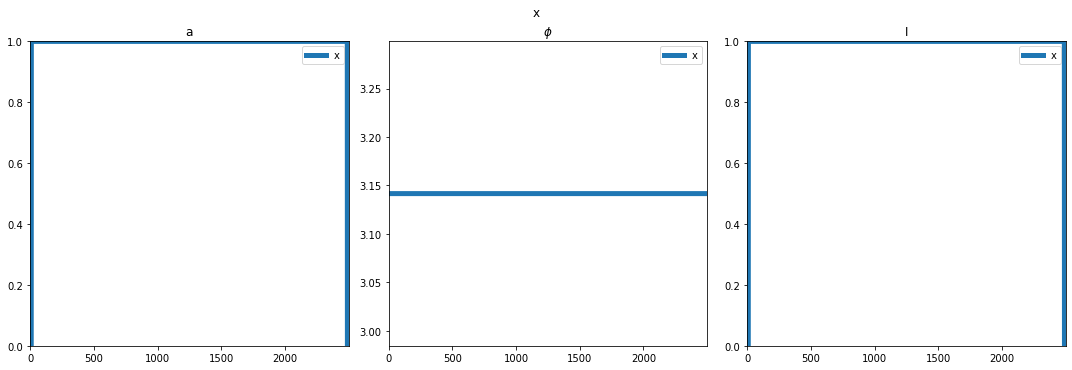

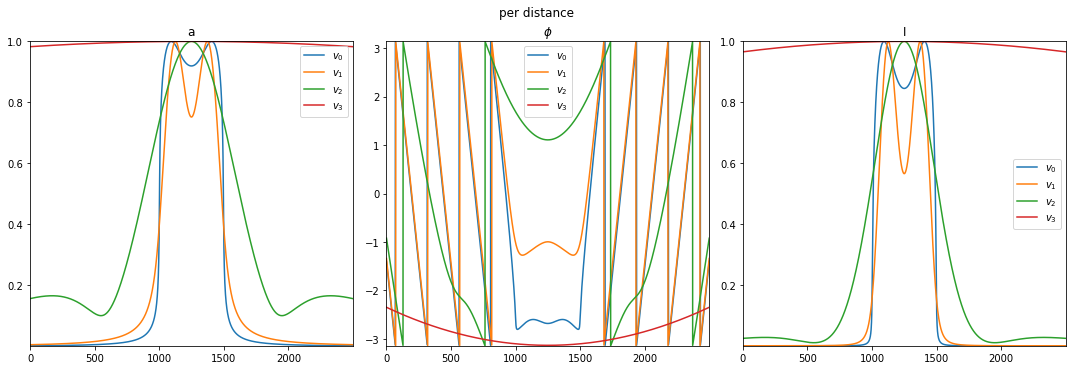

In [5]:
x_width = 2
w = sample_grid(N, x_width*LAMBDA, 0)
V = []
labels = []
width = 10 * LAMBDA
distances = np.geomspace(1e-2, 1e2, 4)
for i,d in enumerate(distances):
# for i,d in enumerate([-1e-1, -1e1, -1e2]):
    V.append(sample_grid(N, width, -d))
    labels.append(r'$v_%i$' % i)
    print('near', width/LAMBDA, d/LAMBDA, near(width, d), '\t d:%0.3f' % d)

x[:] = 0
x[:,1] = np.pi
x[10:-10, 0] = 1

for i in range(len(V)):
    for m in range(N):
        V[i][m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, V[i][m])), distance=-1)
    normalize_amplitude(V[i])

plot.vectors([x], ['x'], title='x', lw=5)
plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)
print('distances (* width)', ', '.join(['10^' + str(d)  for d in np.log10(distances).round(3)]))

### Width: $2\cdot 10^2\lambda$

Warning, phase terms of third order and higher must be negligible
near 200.0 0.1 True 	 d:0.100
Warning, phase terms of third order and higher must be negligible
near 200.0 1.0 True 	 d:1.000
Warning, phase terms of third order and higher must be negligible
near 200.0 10.0 True 	 d:10.000
Warning, phase terms of third order and higher must be negligible
near 200.0 100.0 True 	 d:100.000

x_width: 100.00 lambda
distances (* width) 10^-1.0, 10^0.0, 10^1.0, 10^2.0


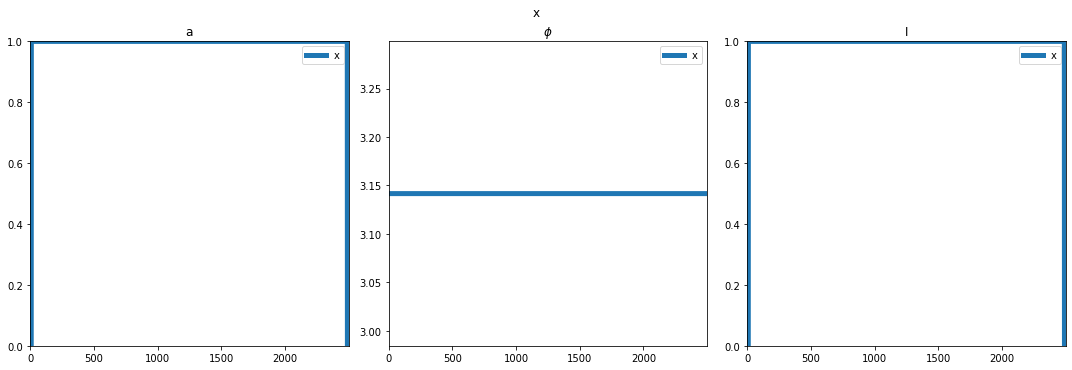

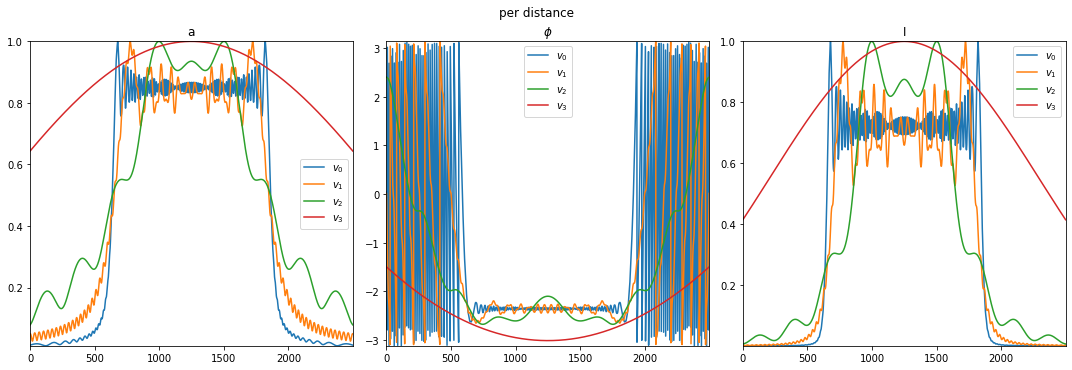

In [6]:
x_width = 1e2
w = sample_grid(N, x_width*LAMBDA, 0)
V = []
labels = []
width = 2 * x_width * LAMBDA
distances = np.geomspace(1e-1, 1e2, 4)
for i,d in enumerate(distances):
    V.append(sample_grid(N, width, -d * width))
    labels.append(r'$v_%i$' % i)
    print('near', width/LAMBDA, d/LAMBDA, near(width, d), '\t d:%0.3f' % d)

x[50:-50, 0] = 1

for i in range(len(V)):
    for m in range(N):
        V[i][m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, V[i][m])), distance=-1)
    normalize_amplitude(V[i])

plot.vectors([x], ['x'], title='x', lw=5);
plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)
print('distances (* width)', ', '.join(['10^' + str(d)  for d in np.log10(distances).round(3)]))

# Double Slit

Warning, phase terms of third order and higher must be negligible
near 40.0 0.01 True 	 d:0.010
Warning, phase terms of third order and higher must be negligible
near 40.0 0.1 True 	 d:0.100
Warning, phase terms of third order and higher must be negligible
near 40.0 1.0 True 	 d:1.000
Warning, phase terms of third order and higher must be negligible
near 40.0 10.0 True 	 d:10.000

x_width: 2.00 lambda
distances (* width) 10^-2.0, 10^-1.0, 10^0.0, 10^1.0


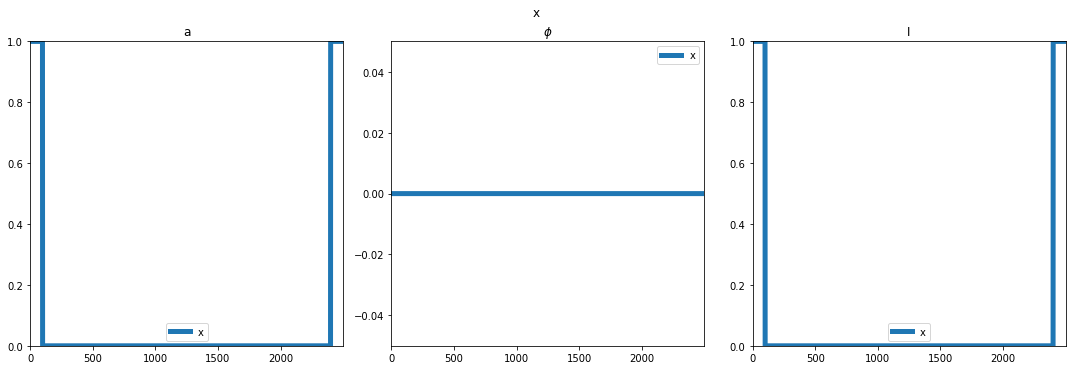

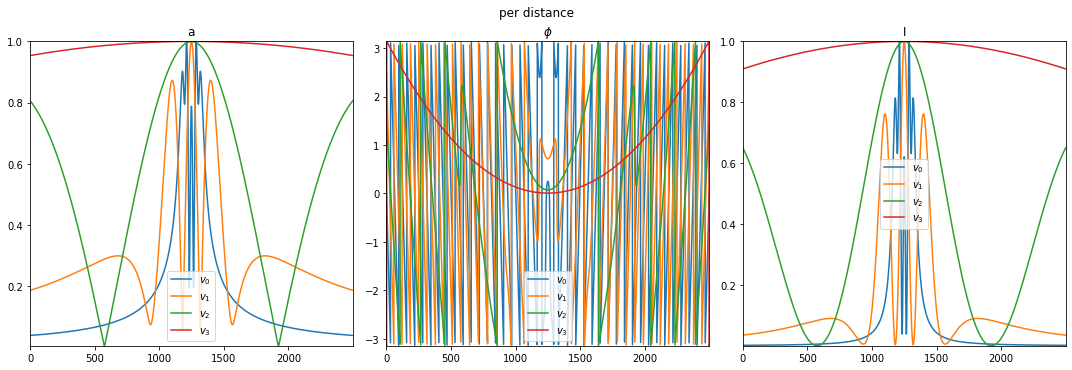

In [7]:
x_width = 2
w = sample_grid(N, x_width*LAMBDA, 0)
V = []
labels = []
width = 20 * x_width * LAMBDA
distances = np.geomspace(1e-2, 1e1, 4)
for i,d in enumerate(distances):
# for i,d in enumerate([-1e-1, -1e1, -1e2]):
    V.append(sample_grid(N, width, -d * width))
    labels.append(r'$v_%i$' % i)
    print('near', width/LAMBDA, d/LAMBDA, near(width, d), '\t d:%0.3f' % d)

x[:] = 0
x[:100, 0] = 1
x[-100:, 0] = 1

for i in range(len(V)):
    for m in range(N):
        V[i][m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, V[i][m])), distance=-1)
    normalize_amplitude(V[i])

plot.vectors([x], ['x'], title='x', lw=5);
plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)
print('distances (* width)', ', '.join(['10^' + str(d)  for d in np.log10(distances).round(3)]))

Warning, phase terms of third order and higher must be negligible
near 1000.0 0.1 True 	 d:0.100
Warning, phase terms of third order and higher must be negligible
near 1000.0 1.0 True 	 d:1.000
Warning, phase terms of third order and higher must be negligible
near 1000.0 10.0 True 	 d:10.000
Warning, phase terms of third order and higher must be negligible
near 1000.0 100.0 True 	 d:100.000

x_width: 100.00 lambda
distances (* width) 10^-1.0, 10^0.0, 10^1.0, 10^2.0


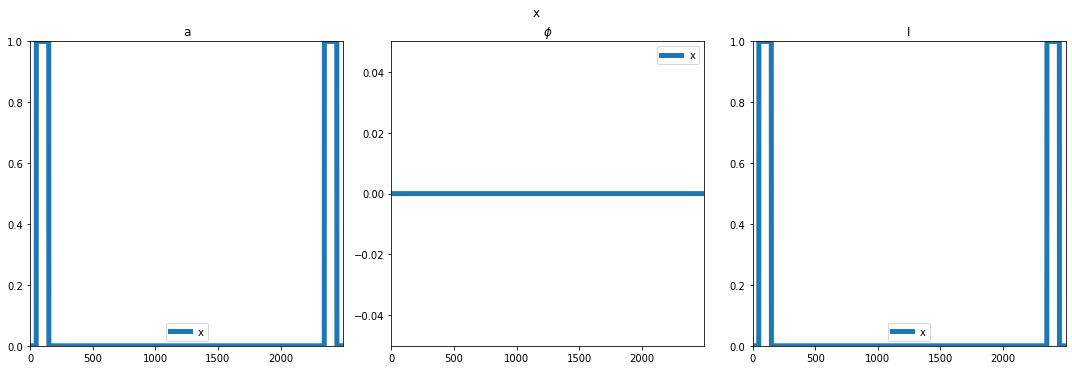

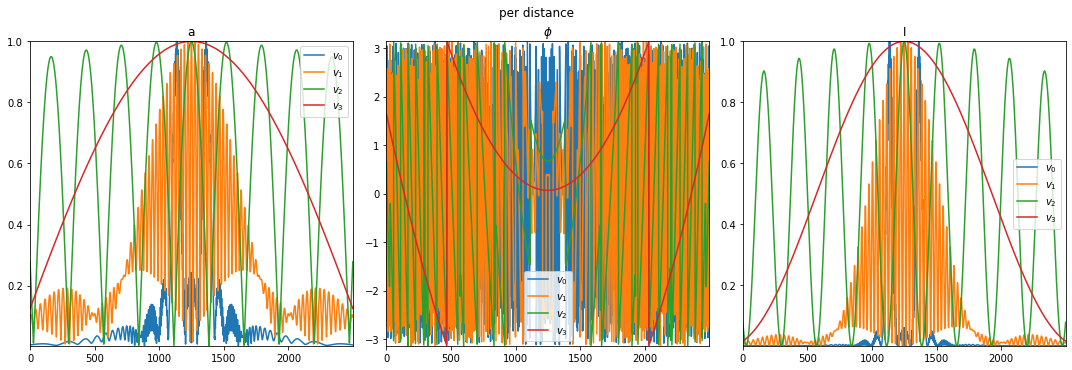

In [8]:
x_width = 1e2
w = sample_grid(N, x_width*LAMBDA, 0)
V = []
labels = []
width = 1e1 * x_width * LAMBDA
distances = np.geomspace(1e-1, 1e2, 4)
for i,d in enumerate(distances):
    V.append(sample_grid(N, width, -d * width))
    labels.append(r'$v_%i$' % i)
    print('near', width/LAMBDA, d/LAMBDA, near(width, d), '\t d:%0.3f' % d)

x[:] = 0
x[50:150, 0] = 1
x[-150:-50, 0] = 1

for i in range(len(V)):
    for m in range(N):
        V[i][m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, V[i][m])), distance=-1)
    normalize_amplitude(V[i])

plot.vectors([x], ['x'], title='x', lw=5)
plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)
print('distances (* width)', ', '.join(['10^' + str(d)  for d in np.log10(distances).round(3)]))

# Projector
### x,y,z
x is source, y is projector, z is projection

x is modelled as collection of point sources, hence the simulation is inaccurate for large angles.


x_width: 1000.00 lambda


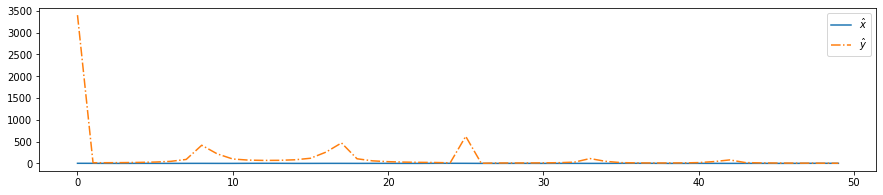

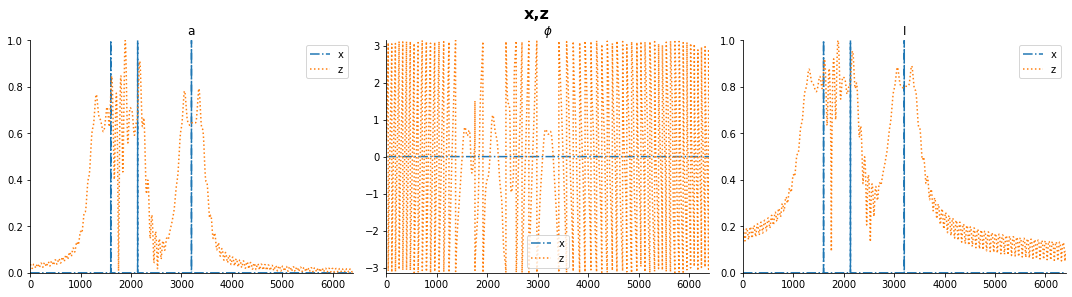

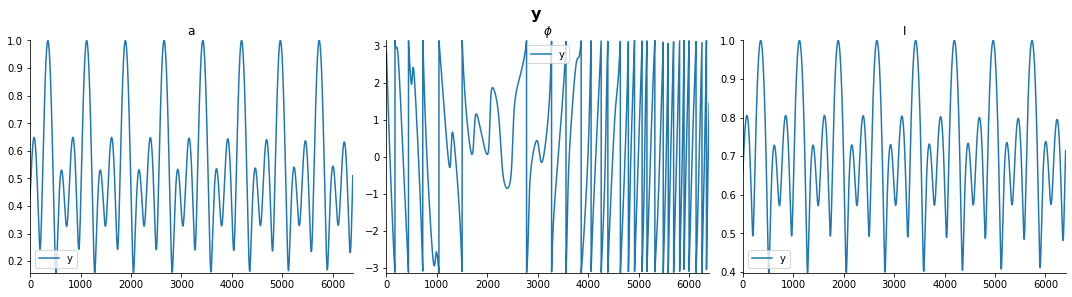

In [7]:
x_width = 1e3
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, x_width*LAMBDA, -1e1 * x_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, 1e0 * x_width*LAMBDA) # or 0

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase

# assume points sources
x[:] = 0
x[[N//2, N//3, N//4], 0] = 1

for m in range(N):
    y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
normalize_amplitude(y)
for m in range(N):
    z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

x_hat = spfft.fft(x[:,0])
y_hat = spfft.fft(y[:,0])
z_hat = spfft.fft(z[:,0]) # irradiance(x)?
i = 50

plt.figure(figsize=(15,3))
plt.plot(np.abs(x_hat[:N//2])[:i], label=r'$\hat x$')
# plt.plot(np.abs(z_hat[:N//2])[:i], label=r'$\hat z$')
plt.plot(np.abs(y_hat[:N//2])[:i], '-.', label=r'$\hat y$')
# plt.axhline(y=1e-4, linewidth=1, color = 'k', label='zero')
# plt.yscale('log')
plt.legend()


plot.vectors([x,z], ['x','z'], title='x,z');
plot.vectors([y], ['y'], title='y');
# plot.vectors([z], ['z'], title='z');
# plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)

In [94]:
# np.append(np.arange(9).reshape((3,3)), np.zeros(3))
# np.vstack([np.arange(9).reshape((3,3)), np.zeros(3)])
# (*(np.arange(8).reshape((4,2))),)
# (*(np.arange(8).reshape((4,2))),)
np.append(np.arange(9).reshape((3,3)), np.zeros((3,1)), axis=1)

array([[0., 1., 2., 0.],
       [3., 4., 5., 0.],
       [6., 7., 8., 0.]])


x_width: 1000.00 lambda


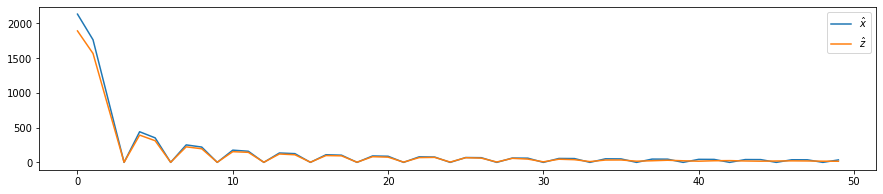

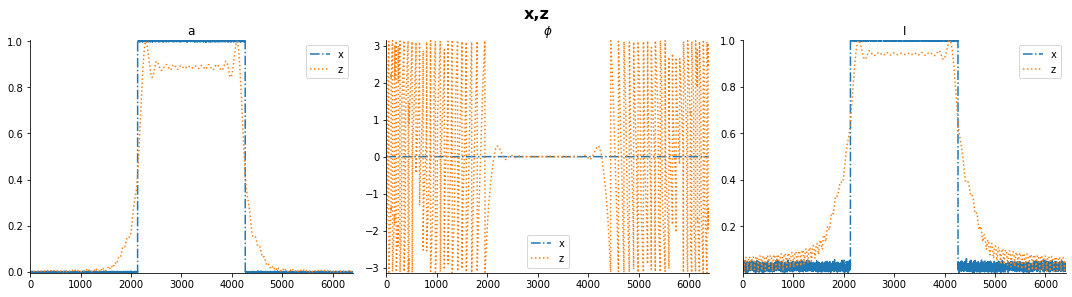

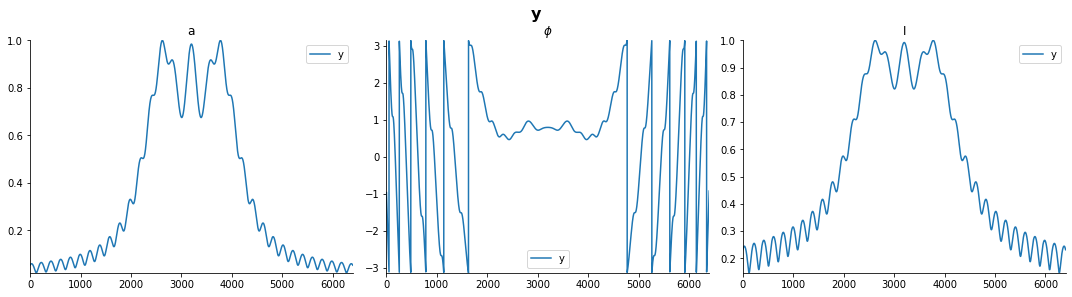

In [13]:
x_width = 1e3
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, x_width*LAMBDA, -1e1 * x_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, 1e0 * x_width*LAMBDA)

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase

# assume points sources
x[:] = 0
x[N//3:2*N//3, 0] = 1
x[:, 0] += np.random.normal(scale=0.001, size=N)

for m in range(N):
    y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m], direction=1)), distance=-1)
#     y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1)), distance=1)
normalize_amplitude(y)
for m in range(N):
    z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

x_hat = spfft.fft(x[:,0])
y_hat = spfft.fft(y[:,0])
# z_hat = spfft.fft(z[:,0])
z_hat = spfft.fft(to_polar(z[:,0],z[:,1]))
z_ifft = spfft.ifft(z_hat)
i = 50

plt.figure(figsize=(15,3))
plt.plot(np.abs(x_hat[:N//2])[:i], label=r'$\hat x$')
# plt.plot(np.abs(y_hat[:N//2])[:i], '-.', label=r'$\hat y$')
plt.plot(np.abs(z_hat[:N//2])[:i], label=r'$\hat z$')
# plt.axhline(y=1e-4, linewidth=1, color = 'k', label='zero')
# plt.yscale('log')
plt.legend()


plot.vectors([x,z], ['x','z'], title='x,z');
plot.vectors([y], ['y'], title='y');
# plot.vectors([z], ['z'], title='z');
# plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)

64 1.0


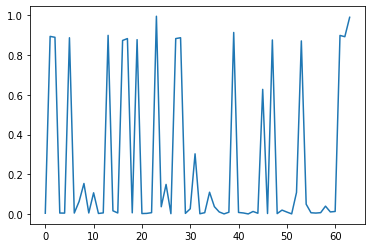

In [36]:
# problem: sample indices are not periodic, TODO use compressive sensing for estimate
n = z.shape[0] // 100
print(n, 100 * n / z.shape[0])
z_partial = np.random.choice(to_polar(z[:,0], z[:,1]), size=n, replace=False)
z_fft = spfft.fft(z_partial)
z_ifft = spfft.ifft(z_fft)
# z_partial.shape
# z_partial
plt.plot(np.abs(z_ifft))

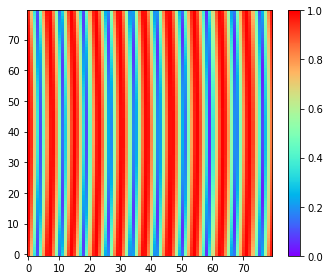

In [111]:
u2 = sample_grid(N, x_width*LAMBDA, 1e0 * x_width*LAMBDA, dims=3)

A = R.from_euler('y', 90, degrees=True).as_matrix()
# A = A[1:, 1:]
u2 = np.matmul(u2, A)

v2 = np.append(v, np.zeros((N,1)), axis=1)
for m in range(N):
    z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v2, u2[m])), distance=1)
normalize_amplitude(z)

# plot.vectors([x,z], ['x','z'], title='x,z');
plot.matrix(reshape(z[:, 0]))


x_width: 1000.00 lambda
distances [  0.1   1.   10.  100. ]


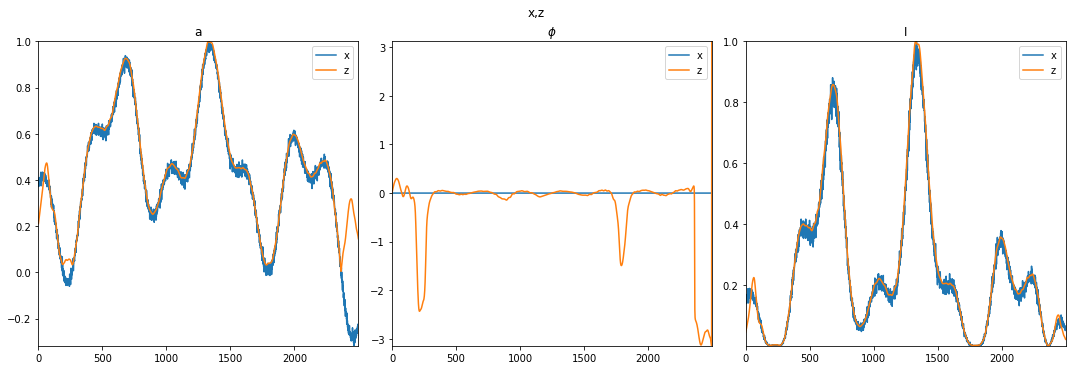

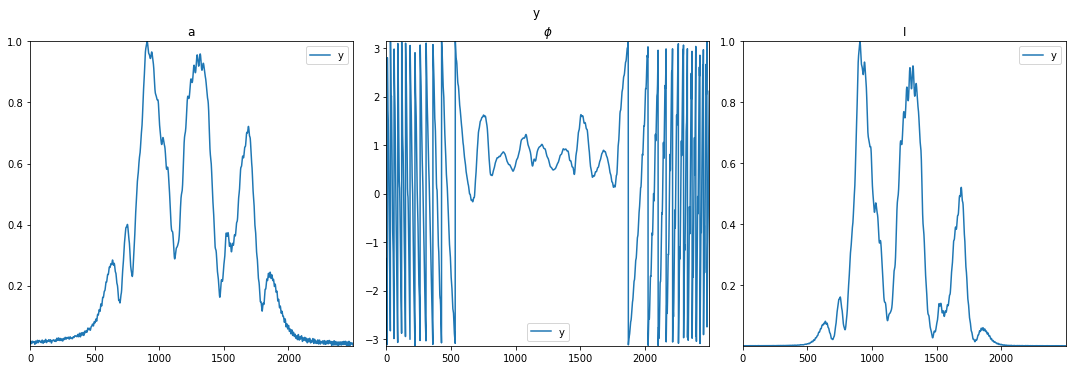

In [11]:
x_width = 1e3
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, 2*x_width*LAMBDA, -1e1 * x_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, 1e0 * x_width*LAMBDA)

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase

# assume points sources
x[:] = 0
t = np.arange(N)
a = np.sin(t * 0.02) + np.sin(t * 0.013)
x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + np.sin(t * 0.00153) + np.sin(t * 0.0083 + 0.9*np.pi) \
    + np.random.normal(scale=0.05, size=N)
normalize_amplitude(x)

for m in range(N):
    y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
normalize_amplitude(y)
for m in range(N):
    z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.vectors([x,z], ['x','z'], title='x,z');
plot.vectors([y], ['y'], title='y');
# plot.vectors([z], ['z'], title='z');
# plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)
print('distances', distances.round(3))

In [12]:
# x_width = 1e3
# DIMS = 2
# w = sample_grid(N, x_width*LAMBDA, 0, random=1)
# v = sample_grid(N, 2*x_width*LAMBDA, -1e1 * x_width*LAMBDA, random=1)
# u = sample_grid(N, x_width*LAMBDA, 1e0 * x_width*LAMBDA, random=1)

# x = np.zeros(shape=(N,2)) # amplitude, phase
# y = np.empty((N,2))  # amplitude, phase
# z = np.empty((N,2))  # amplitude, phase

# # assume points sources
# x[:] = 0
# t = w[:,:-1]
# x[:,0] = np.sum(2 + 0.5 * np.sin(t * 0.02) + np.sin(t * 0.00153) + np.sin(t * 0.0083 + 0.9*np.pi) \
#     + np.random.normal(scale=0.05, size=(N,DIMS-1)),axis=1)
# normalize_amplitude(x)

# for m in range(N):
#     y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
# normalize_amplitude(y)

# M = 10
# ri = np.random.choice(N, M, replace=False)
# A = spfft.idct(np.identity(N), norm='ortho', axis=0)
# A = A[ri]

# # g1 = lambda w: np.matmul(A, w[ri]) == x[ri]
# g2 = lambda w: scipy.linalg.norm(w, ord=1)
# eta = 0.01
# c = scipy.optimize.LinearConstraint(A, y[ri, 0] - eta, y[ri, 0] + eta)
# y_hat = scipy.optimize.minimize(g2, np.random.random(N), constraints=c)

# # # do L1 optimization
# # vx = cvx.Variable(n)
# # objective = cvx.Minimize(cvx.norm(vx, 1))
# # constraints = [A*vx == y2]
# # prob = cvx.Problem(objective, constraints)
# # result = prob.solve(verbose=True)
# y = y_hat

# for m in range(y_hat.shape[0]):
#     z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
# normalize_amplitude(z)

# plot.vectors([x,z], ['x','z'], title='x,z');
# plot.vectors([y], ['y'], title='y');
# # plot.vectors([z], ['z'], title='z');
# # plot.vectors(V, labels, title='per distance');
# print('\nx_width: %0.2f lambda' % x_width)
# print('distances', distances.round(3))

In [13]:
DIMS = 2

# def K_dft(n,k,N):
# #     N = compute_N_sqrt()
#     return np.exp(-2j * np.pi * n * k / N)

# def K(n,k, width1=1, width2=1, offset=0, N_sqrt=100):
# #     N_sqrt = compute_N_sqrt()
#     dx1 = 1/width1
#     dx2 = 1/width2
#     shape = (N_sqrt,) * (DIMS - 1)
#     v = np.array(np.unravel_index([n], shape) + (0,))
#     w = np.array(np.unravel_index([k], shape) + (offset,))
#     v[:2] *= dx1
#     w[:2] *= dx2
# #     v = w = np.array([0,1])
#     delta = scipy.linalg.norm(v - w, ord=2, axis=-1)
#     return np.exp(-2j * np.pi * delta/LAMBDA)

freqs [49.9]


(0.0006, 828.3400000000001, 249.3772047711713)

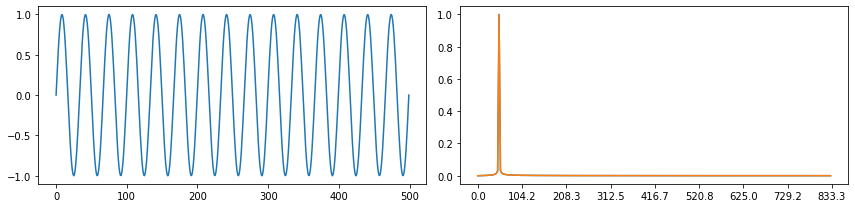

In [14]:
M = 500
f = 50
T = 0.3
dx = T / (M-1)
t = np.arange(M) * dx # == np.linspace(0,T,M)
x[:M,0] = np.sin(2 * np.pi * f * t)
y = np.zeros(M)
for i in range(M):
    y[i] = np.abs(np.sum([x[j,0] * K_dft(j,i, N=M) for j in range(M)]))
#     y[i] = np.abs(np.sum([x[j,0] * K(j,i, N_sqrt=M) for j in range(M)]))

plt.figure(figsize=(12,3))
# plt.plot(np.abs(x_hat))
plt.subplot(121)
plt.plot(x[:M,0])
plt.subplot(122)
y_hat = np.abs(spfft.fft(x[:M,0]))
print('freqs', scipy.signal.find_peaks(y_hat[:M//2])[0] /dx/M)
plt.plot(y_hat[:M//2] / np.abs(y_hat).max())
plt.plot(y[:M//2] / y.max())
n_ticks = 9
plt.xticks(np.linspace(0, M//2, n_ticks), (np.linspace(0, M//2, n_ticks)/T).round(1))
# plt.xticks(np.linspace(0, M//2, n_ticks), np.arange(n_ticks))
# plt.margins(0.01)
plt.tight_layout()
round(dx,4), spfft.fftfreq(M, d=dx).max(), y.max()


x_width: 1000.00 lambda
distances [  0.1   1.   10.  100. ]


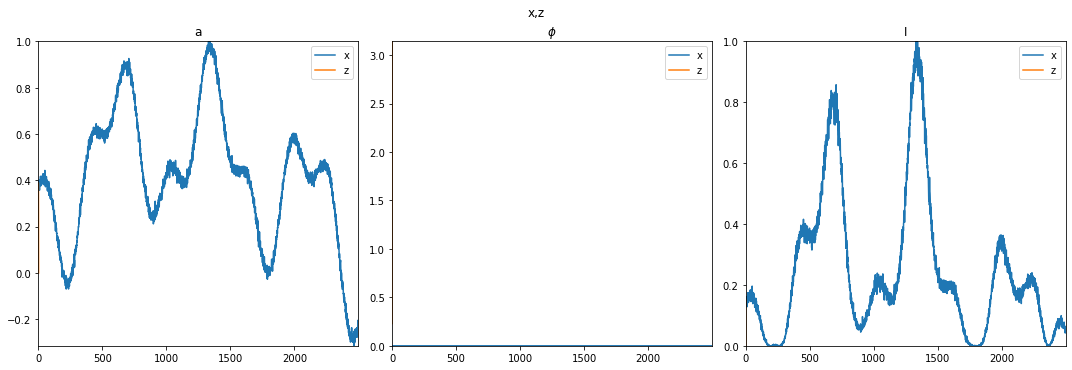

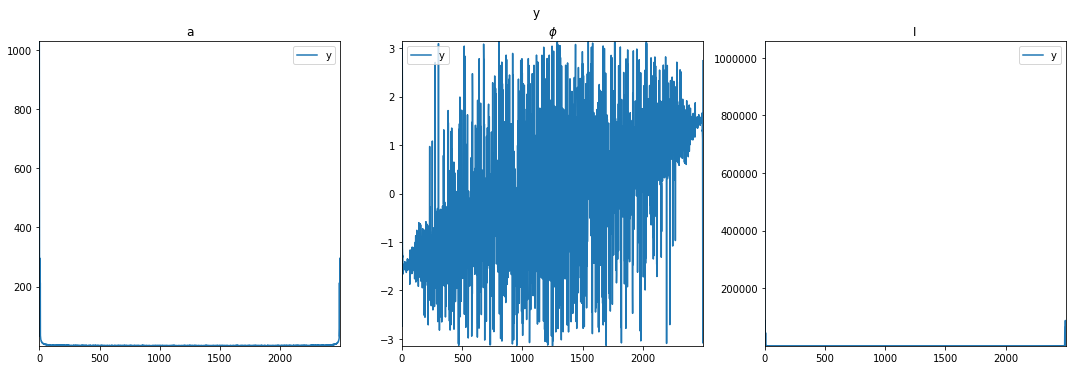

In [15]:
x_width = 1e3
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, 2*x_width*LAMBDA, -1e1 * x_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, 1e0 * x_width*LAMBDA)

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase

# assume points sources
x[:] = 0
t = np.arange(N)
a = np.sin(t * 0.02) + np.sin(t * 0.013)
x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + np.sin(t * 0.00153) + np.sin(t * 0.0083 + 0.9*np.pi) \
    + np.random.normal(scale=0.05, size=N)
normalize_amplitude(x)


y = np.array(from_polar(spfft.fft(x[:,0]))).T
z = np.array(from_polar(spfft.ifft(to_polar(y[:,0], -y[:,1]))))


# for m in range(N):
#     y[m,:] = from_polar(
#         np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
# normalize_amplitude(y)
# for m in range(N):
#     z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
# normalize_amplitude(z)

plot.vectors([x,z], ['x','z'], title='x,z');
plot.vectors([y], ['y'], title='y');
# plot.vectors([z], ['z'], title='z');
# plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)
print('distances', distances.round(3))

## Diff ordering x,y,z
x is original object, y is ground truth perspective of user, z is projector, y2 is projection (at user)

In [16]:
x_width = 1e3
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, 2*x_width*LAMBDA, 1e2 * x_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, -1e2 * x_width*LAMBDA)
v2 = sample_grid(N, x_width*LAMBDA, 1e2 * x_width*LAMBDA)

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase
y2 = np.zeros(shape=(N,2)) # amplitude, phase

# assume points sources
x[:] = 0
t = np.arange(N)
a = np.sin(t * 0.02) + np.sin(t * 0.013)
x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + np.sin(t * 0.00153) + np.sin(t * 0.0083 + 0.9*np.pi) \
    + np.random.normal(scale=0.05, size=N)
normalize_amplitude(x)

for m in range(N):
    y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=1)
normalize_amplitude(y)
for m in range(N):
    z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=-1)
normalize_amplitude(z)
for m in range(N):
    y2[m,:] = from_polar(np.sum(f(z[:,0], z[:,1], w, v2[m])), distance=1)
normalize_amplitude(y2)


plot.vectors([x,y], ['x','z'], title='x,z');
plot.vectors([y,y2], ['y','y2'], title='y,y2');
print('\nx_width: %0.2f lambda' % x_width)

TypeError: 'int' object is not callable

# Frequency domain

TODO, learn a function $g$ s.t.
$$ \vec y = \mathcal{F}^{-1}\circ g \circ \mathcal{F} \circ \vec x, $$

using a finite dataset (e.g. different circle-shape sizes, generated using brute-force method).
Then use $g$ to e.g.
- generate interpolated projections.
- scale up the domain


x_width: 1000.00 lambda


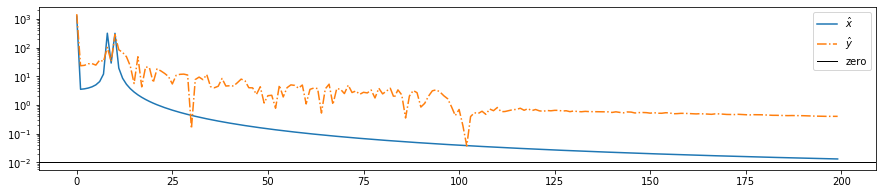

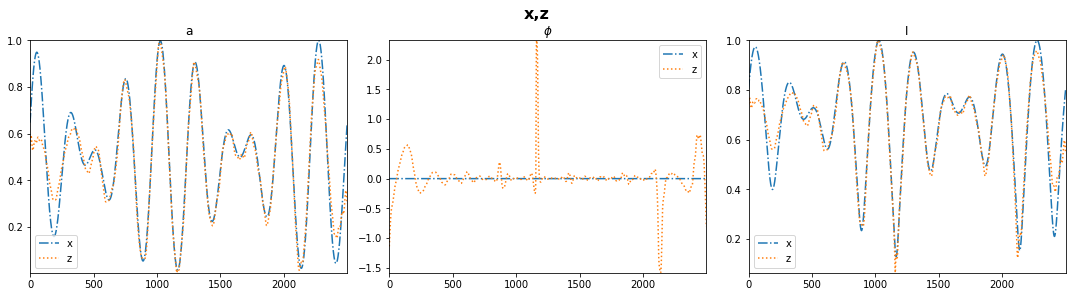

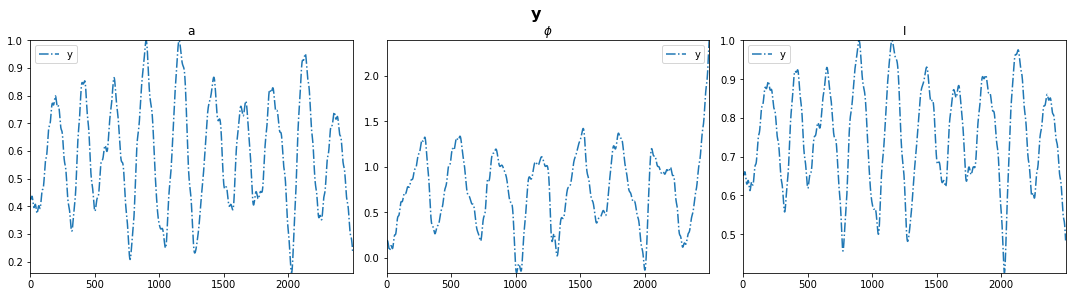

In [158]:
reload(plot)
x_width = 1e3
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, x_width*LAMBDA, -1e1 * x_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, 0)

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase

# assume points sources
x[:] = 0
t = np.arange(N)
a = np.sin(t * 0.02) + np.sin(t * 0.013)
# x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + np.sin(t * 0.00153) + np.sin(t * 0.0083 + 0.9*np.pi) \
#     + np.random.normal(scale=0.05, size=N)
x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + 0.5 * np.sin(t * 0.0253 + 0.2*np.pi)
normalize_amplitude(x)

for m in range(N):
#     y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
    # source object
    c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
    c += f(1/N, 0, 0, np.ones(util.DIMS).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)  
    
    
normalize_amplitude(y)
for m in range(N):
    z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

x_hat = spfft.fft(x[:,0])
y_hat = spfft.fft(y[:,0])
z_hat = spfft.fft(z[:,0])
i = 200

plt.figure(figsize=(15,3))
plt.plot(np.abs(x_hat[:N//2])[:i], label=r'$\hat x$')
# plt.plot(np.abs(z_hat[:N//2])[:i], label=r'$\hat z$')
plt.plot(np.abs(y_hat[:N//2])[:i], '-.', label=r'$\hat y$')
plt.axhline(y=1e-2, linewidth=1, color = 'k', label='zero')
plt.legend()
plt.yscale('log')


# plt.figure(figsize=(15,3))
# plt.subplot(131)
# plt.plot(x[:,0], '-.', label='x')
# plt.plot(z[:,0], '-.', label='z')
# plt.legend()

# plt.subplot(121)
# plt.title(r'$i_{\max}$: %i' % (N//2))
# plt.plot(np.abs(spfft.ifft(x_hat)), label=r'$FF x$')
# plt.plot(np.abs(spfft.ifft(z_hat)), label=r'$FF z$')
# plt.plot(np.abs(spfft.ifft(y_hat)), '-.', label=r'$FF y$')
# # plt.plot(x)
# # plt.plot(z)
# plt.legend()

# plt.subplot(122)
# plt.title(r'$i_{\max}$: %i' % i)
# plt.plot(np.abs(spfft.ifft(x_hat[:i])), label=r'$\hat x$')
# plt.plot(np.abs(spfft.ifft(z_hat[:i])), label=r'$\hat z$')
# plt.plot(np.abs(spfft.ifft(y_hat[:i])), '-.', label=r'$\hat y$')
# plt.legend()


plot.vectors([x,z], ['x','z'], title='x,z');
plot.vectors([y], ['y'], title='y');
# plot.vectors([z], ['z'], title='z');
# plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)


x_width: 10000.00 lambda


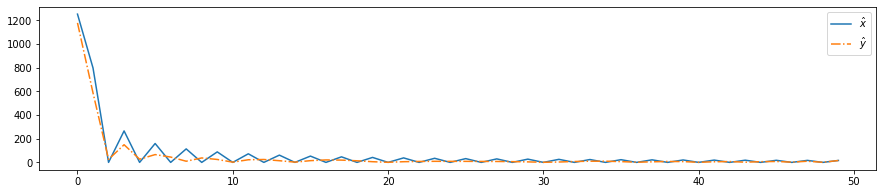

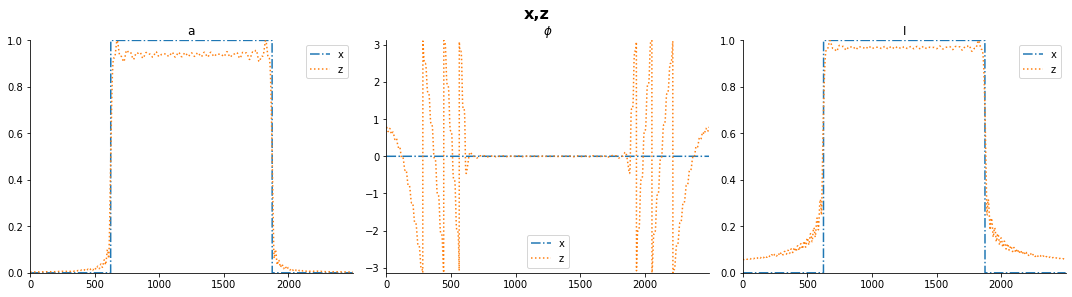

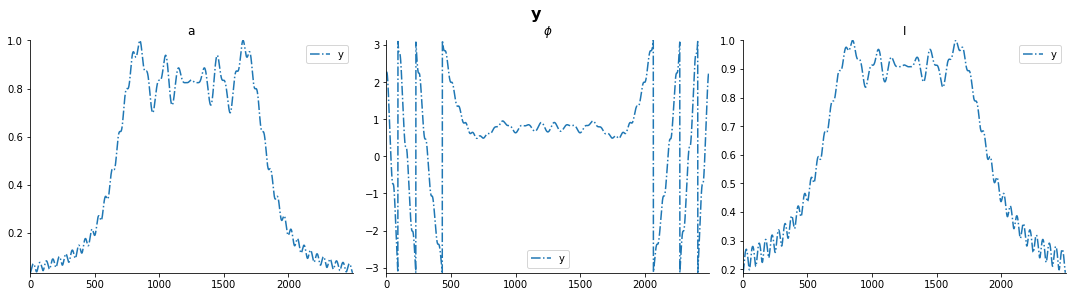

In [315]:
reload(plot)
x_width = 1e4
y_width = 1e4
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, y_width*LAMBDA, -1e2 * y_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, 0)

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase

# assume points sources
x[:] = 0
t = np.arange(N)
a = np.sin(t * 0.02) + np.sin(t * 0.013)
# x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + np.sin(t * 0.00153) + np.sin(t * 0.0083 + 0.9*np.pi) \
#     + np.random.normal(scale=0.05, size=N)
# x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + 0.5 * np.sin(t * 0.0253 + 0.2*np.pi)
x[N//4:-N//4,0] = 1
# x[:,0] += np.random.normal(scale=0.01, size=N)
normalize_amplitude(x)

for m in range(N):
#     y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
    # source object
    c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
#     c += f(1, 0, 0, np.ones(util.DIMS).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)  


normalize_amplitude(y)
for m in range(N):
    z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

x_hat = spfft.fft(x[:,0])
y_hat = spfft.fft(y[:,0])
z_hat = spfft.fft(z[:,0])
i = 50

plt.figure(figsize=(15,3))
plt.plot(np.abs(x_hat[:N//2])[:i], label=r'$\hat x$')
# plt.plot(np.abs(z_hat[:N//2])[:i], label=r'$\hat z$')
plt.plot(np.abs(y_hat[:N//2])[:i], '-.', label=r'$\hat y$')
# plt.axhline(y=1e-4, linewidth=1, color = 'k', label='zero')
# plt.yscale('log')
plt.legend()

plot.vectors([x,z], ['x','z'], title='x,z');
plot.vectors([y], ['y'], title='y');
# plot.vectors([z], ['z'], title='z');
# plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)

### Increase contrast


x_width: 10000.00 lambda


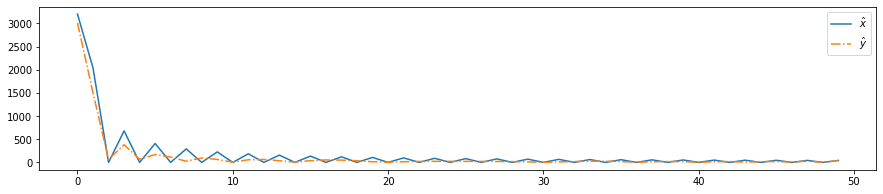

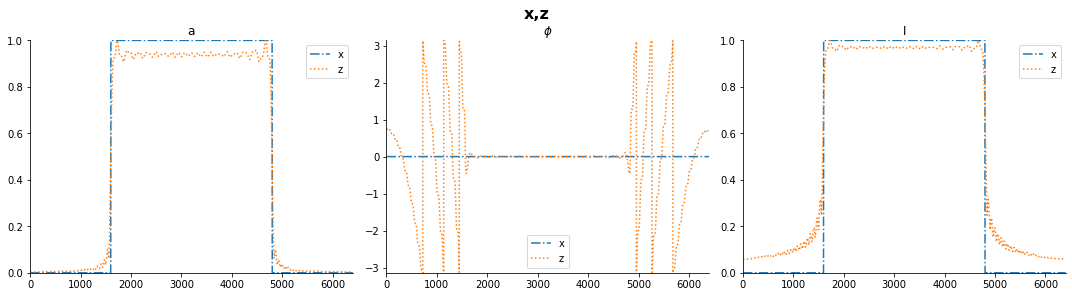

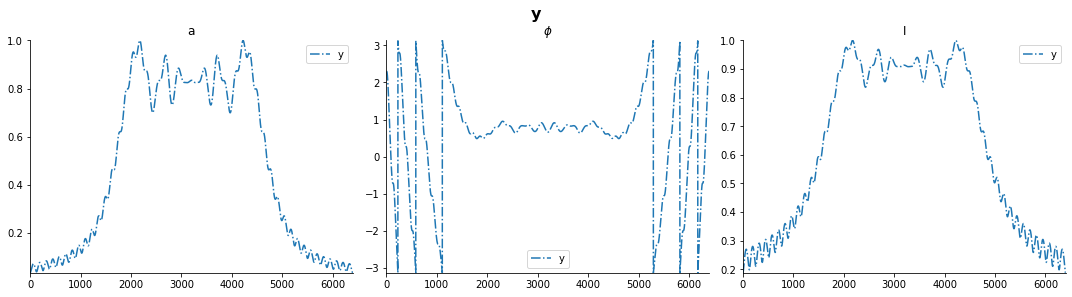

In [21]:
reload(plot)
x_width = 1e4
y_width = 1e4
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, y_width*LAMBDA, -1e2 * y_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, 0)

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase

# assume points sources
x[:] = 0
# x[:,0] = -0.1
t = np.arange(N)
a = np.sin(t * 0.02) + np.sin(t * 0.013)
# x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + np.sin(t * 0.00153) + np.sin(t * 0.0083 + 0.9*np.pi) \
#     + np.random.normal(scale=0.05, size=N)
# x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + 0.5 * np.sin(t * 0.0253 + 0.2*np.pi)
x[N//4:-N//4,0] = 1
# for i in range(0,N,2):
#     x[i,0] = 0
# x[:,0] += np.random.normal(scale=0.01, size=N)
normalize_amplitude(x)


for m in range(N):
#     y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
    # source object
    c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
#     c += f(1, 0, 0, np.ones(util.DIMS).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)  


normalize_amplitude(y)
for m in range(N):
    z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

x_hat = spfft.fft(x[:,0])
y_hat = spfft.fft(y[:,0])
z_hat = spfft.fft(z[:,0])
i = 50

plt.figure(figsize=(15,3))
plt.plot(np.abs(x_hat[:N//2])[:i], label=r'$\hat x$')
# plt.plot(np.abs(z_hat[:N//2])[:i], label=r'$\hat z$')
plt.plot(np.abs(y_hat[:N//2])[:i], '-.', label=r'$\hat y$')
# plt.axhline(y=1e-4, linewidth=1, color = 'k', label='zero')
# plt.yscale('log')
plt.legend()

plot.vectors([x,z], ['x','z'], title='x,z');
plot.vectors([y], ['y'], title='y');
# plot.vectors([z], ['z'], title='z');
# plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)

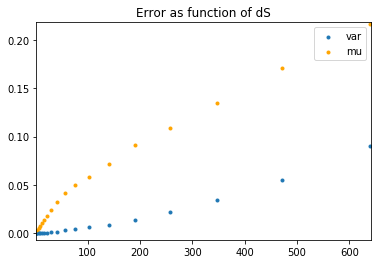

In [22]:
# I = to_polar(y[:,0], y[:,1])
# np.cov(y[:,0].reshape(1,-1))
a = y[:,0]
# np.cov(np.array([a,a]).reshape(1,-1))

# print('dS \t correlation coef \t p-value << 1')
# for dS in range(0, N//10 - 2, 50):
for dS in np.geomspace(2, N//10, 20).astype(int):
    diff = []
    for i in range(dS,N-dS,1):
        for j in [-1,1]:
            diff.append(a[i] - a[i + j*dS])

#     correlation, p = scipy.stats.pearsonr(X,Y)
    var = np.var(diff)
    mu = np.mean(np.abs(diff))
#     print('%i\t %0.4f \t\t (%i)' % (dS, correlation, 1 if p < 0.0001 else 0))
#     print('%i\t %0.4f' % (dS, var))
    plt.scatter(dS, var, marker='.', label='var', c='#1f77b4')
    plt.scatter(dS, mu, marker='.', label='mu', c='orange')    

plt.title('Error as function of dS')
plt.margins(0)
plt.legend(['var', 'mu'])

### Gradient / gaussian


x_width: 10000.00 lambda


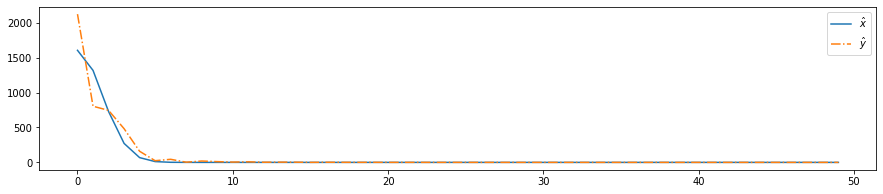

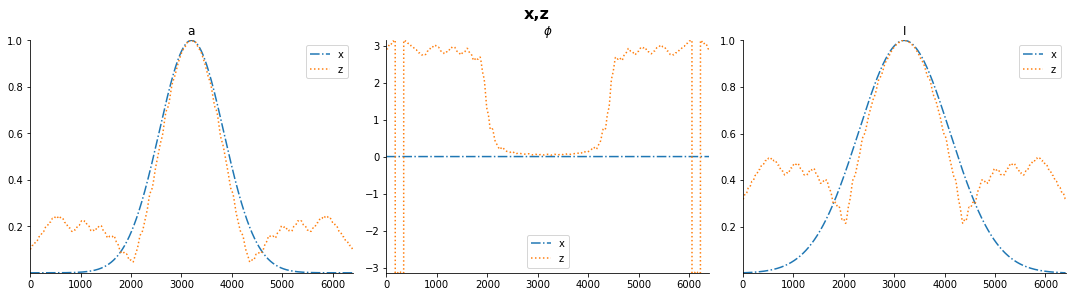

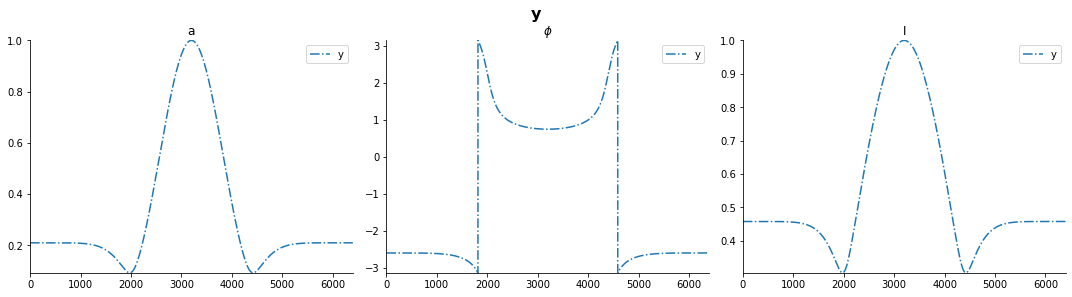

In [13]:
x_width = 1e4
y_width = 1e4
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, y_width*LAMBDA, -1e2 * y_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, 0)

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase

# assume points sources
x[:] = 0
x[:,0] = -0.1
t = np.arange(N)
# x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + np.sin(t * 0.00153) + np.sin(t * 0.0083 + 0.9*np.pi) \
#     + np.random.normal(scale=0.05, size=N)
# x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + 0.5 * np.sin(t * 0.0253 + 0.2*np.pi)
# x[N//4:-N//4,0] = 1
x[:,0] = np.exp(-0.5 * np.linspace(-5,5,N)**2)
# x[:,0] += np.random.normal(scale=0.01, size=N)
normalize_amplitude(x)


for m in range(N):
#     y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
    # source object
#     c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    c = sum_kernel(x,w,v[m], direction=-1)
    # plane wave
    c += f(1/N, 0, 0, np.ones(util.DIMS).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)  


normalize_amplitude(y)
map_sum_kernel(y,z,v,u,distance=1)
# for m in range(N):
#     z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

x_hat = spfft.fft(x[:,0])
y_hat = spfft.fft(y[:,0])
z_hat = spfft.fft(z[:,0])
i = 50

plt.figure(figsize=(15,3))
plt.plot(np.abs(x_hat[:N//2])[:i], label=r'$\hat x$')
# plt.plot(np.abs(z_hat[:N//2])[:i], label=r'$\hat z$')
plt.plot(np.abs(y_hat[:N//2])[:i], '-.', label=r'$\hat y$')
# plt.axhline(y=1e-4, linewidth=1, color = 'k', label='zero')
# plt.yscale('log')
plt.legend()

plot.vectors([x,z], ['x','z'], title='x,z')
plot.vectors([y], ['y'], title='y')
# plot.vectors([z], ['z'], title='z')
# plot.vectors(V, labels, title='per distance');
print('\nx_width: %0.2f lambda' % x_width)

# Control variates

$$ \mathbb{E}[X] = \mathbb{E}[X + c(Y - \mathbb{E}[Y])] =\mathbb{E}[X + c(Y - \mu)] $$

$$ c = -\frac{\text{Cov}[X,Y]}{\text{Var}[Y]} $$

Then, the variance is 
$$ \text{Var}[X + c(Y - \mathbb{E}[Y])] = \text{Var}[X] + c^2\text{Var}[Y] + 2c\text{Cov}[X,Y] $$

In [109]:
# reload(plot)
x_width = 1e4
y_width = 1e4
w = sample_grid(N, x_width*LAMBDA, 0)
v = sample_grid(N, y_width*LAMBDA, -1e2 * y_width*LAMBDA)
u = sample_grid(N, x_width*LAMBDA, 0)

x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase

# assume points sources
x[:] = 0
# t = np.arange(N)
# a = np.sin(t * 0.02) + np.sin(t * 0.013)
# x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + np.sin(t * 0.00153) + np.sin(t * 0.0083 + 0.9*np.pi) \
#     + np.random.normal(scale=0.05, size=N)
# x[:,0] = 1 + 0.5 * np.sin(t * 0.02) + 0.5 * np.sin(t * 0.0253 + 0.2*np.pi)
x[N//4:-N//4,0] = 1
# x[:,0] += np.random.normal(scale=0.01, size=N)
# x[:,0] = np.exp(-0.5 * np.linspace(-5,5,N)**2)
normalize_amplitude(x)

# compute Cov[X,Y]
X_values = []
Y_values = []
c_acc = []
c_reduction = []
var_X = []
covs = []
for m in range(N):
    acc = f(x[:,0], x[:,1], w, v[m], direction=-1)
    # Var[Y] ~ width
    cov = np.cov(acc, w[:,0] / x_width)
    cov_XY = cov[0,1]
    var_Y = cov[1,1]
    c = - cov_XY / var_Y
    c_acc.append(c)
    c_reduction.append(- cov_XY**2 / var_Y)
    var_X.append(cov[0,0])
    covs.append(cov_XY)

#     for i in range(N):
#         distance_from_center = w[i, 0]
#         X_values.append(acc[i])
#         Y_values.append(distance_from_center)

# for m in range(N):
# #     y[m,:] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
#     acc = 0
#     for i in range(N):
#         # source object
#         acc += f(x[:,0], x[:,1], w, v[m], direction=-1)
        
#         # add control variance
#         distance_from_center = v[m, 0]
#         # mu = 0
#         acc += c * distance_from_center
        
#     # plane wave
# #     acc += f(1, 0, 0, np.ones(util.DIMS).reshape(1,-1))
#     y[m, :] = from_polar(acc, distance=1)  


# normalize_amplitude(y)
# for m in range(N):
#     z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
# normalize_amplitude(z)

# x_hat = spfft.fft(x[:,0])
# y_hat = spfft.fft(y[:,0])
# z_hat = spfft.fft(z[:,0])
# i = 50

# plt.figure(figsize=(15,3))
# plt.plot(np.abs(x_hat[:N//2])[:i], label=r'$\hat x$')
# # plt.plot(np.abs(z_hat[:N//2])[:i], label=r'$\hat z$')
# plt.plot(np.abs(y_hat[:N//2])[:i], '-.', label=r'$\hat y$')
# # plt.axhline(y=1e-4, linewidth=1, color = 'k', label='zero')
# # plt.yscale('log')
# plt.legend()

# plot.vectors([x,z], ['x','z'], title='x,z');
# plot.vectors([y], ['y'], title='y');
# # plot.vectors([z], ['z'], title='z');
# # plot.vectors(V, labels, title='per distance');
# print('\nx_width: %0.2f lambda' % x_width)

In [110]:
np.max(np.abs(c_acc))

2.6756708289727186e-07

In [111]:
np.max(np.abs(covs))

2.2307711469710303e-08

In [112]:
np.max(np.abs(c_reduction))

5.968809284064398e-15

In [113]:
100 * np.mean(np.abs(c_reduction) / np.abs(var_X))

0.25041205840900993

In [117]:
1/np.sqrt(100), 1/np.sqrt(200)

(0.1, 0.07071067811865475)

In [55]:
X_values = []
Y_values = []
m = N//2
acc = f(x[:,0], x[:,1], w, v[m], direction=-1)
for i in range(N):
    distance_from_center = w[i, 0]
    X_values.append(acc[i])
    Y_values.append(distance_from_center)

In [61]:
print(np.cov(np.real(X_values), Y_values))

[[ 2.71896152e-13 -2.12468874e-07]
 [-2.12468874e-07  8.33724060e+06]]


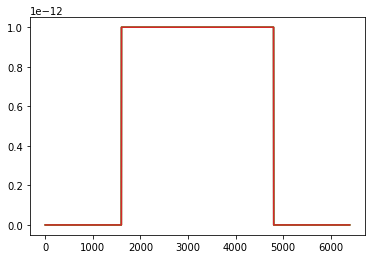

In [53]:
for m in [0, N//3, N //2, N-1]:
    acc = f(x[:,0], x[:,1], w, v[m], direction=-1)
    plt.plot(np.abs(acc * np.conjugate(acc)))

In [67]:
np.cov(np.real(X_values), Y_values)[0,1]

-2.1246887377878894e-07

# Sampling distributions


x_width: 100.00 lambda


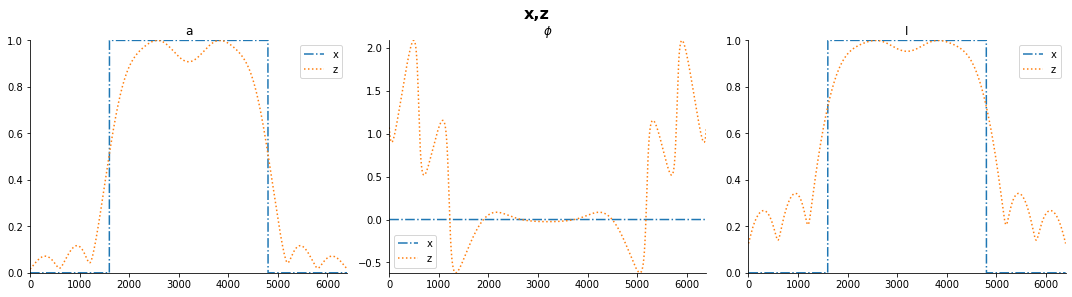

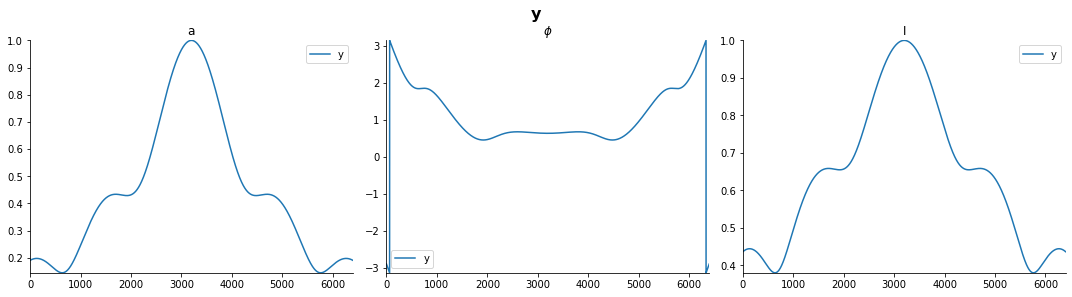

In [124]:
n = N
x_width = 1e2
y_width = 1e2
w = sample_grid(n, x_width*LAMBDA, 0)
v = sample_grid(n, y_width*LAMBDA, -1e1 * y_width*LAMBDA)
u = sample_grid(n, x_width*LAMBDA, 0)

x = np.zeros(shape=(n,2)) # amplitude, phase
y = np.empty((n,2))  # amplitude, phase
z = np.empty((n,2))  # amplitude, phase

# assume points sources
x[:] = 0
x[N//4:-N//4,0] = 1
# x[N//2, 0] = 1
normalize_amplitude(x)

for m in range(N):
    # source object
    c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
#     c += f(N, 0, 0, np.ones(util.DIMS).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)  

normalize_amplitude(y)
for m in range(N):
    z[m,:] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.vectors([x,z], ['x','z'], title='x,z');
plot.vectors([y], ['y'], title='y');
print('\nx_width: %0.2f lambda' % x_width)